<h2>Project 0: Inagural Project</h2>

Household joint utility maximization of labor  

0: Setting the scene

In [1]:
# Importing libraries
import ipywidgets as widgets
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# autoreload module code
%load_ext autoreload
%autoreload 2

# Importing the model class
import HouseholdSpecializationModel
from HouseholdSpecializationModel import *

# Giving class an easy alias as the variable mo
mo = HouseholdSpecializationModelClass()

1:  Illustrate how $H_F/H_M$ changes when varying $\alpha$

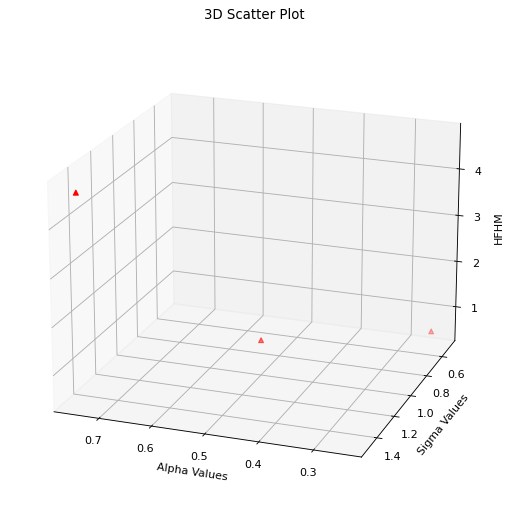

In [3]:
# Storing values in lists

alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1, 1.5]

# Creating empty list for HF/HM

H_div = []

# Looping through values of alpha, sigma and finding corresponding HF/HM

for i, j in zip(alpha_values, sigma_values):
    # Instantiating object to the Household Class
    optimize = HouseholdSpecializationModelClass()
    # Setting object attributes equal to the i,j values from the value lists
    optimize.par.alpha = i
    optimize.par.sigma = j
    # Defining optimize class method 
    opt = optimize.solve_discrete()
    # Calling optimize class method while appending the function values (divided) to the empty list
    np.array(H_div.append(opt.HF/opt.HM))

# Checing results
H_div

# Create a figure with transparent background
fig = plt.figure(figsize=(10, 8), dpi=80, facecolor='none')

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the values

ax.scatter(alpha_values, sigma_values, H_div, marker='^', c='red')

# Set the labels and title
ax.set_xlabel('Alpha Values')
ax.set_ylabel('Sigma Values')
ax.set_zlabel('HFHM', rotation=90, fontsize=10) # rotate the z-label by 90 degrees and increase font size
ax.set_title('3D Scatter Plot')

# Add a dotted grid
ax.grid(True, linestyle='dotted')

# Set the viewing angle
ax.view_init(elev=20, azim=110)

# Show the plot
plt.show()

2. plot $log H_F/H_M$ against $log w_F/w_M$ for $w_F \in [0.8, 0.9, 1, 1.1, 1.2]$

Text(0, 0.5, 'log wF/wM')

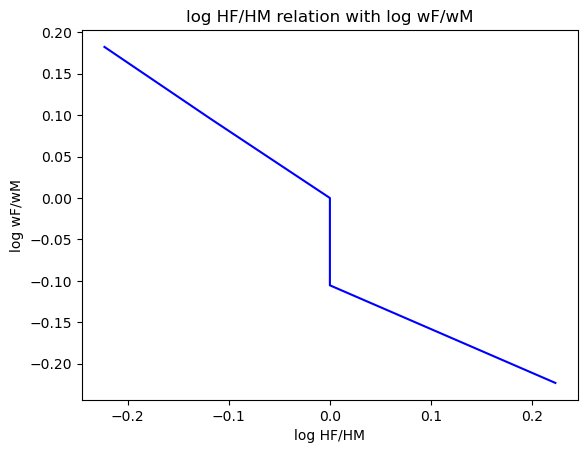

In [4]:
# Using the same loop method as in problem 1 we now loop for wF values
# Importing the class as the variable model

model = HouseholdSpecializationModelClass()

# Creating empty lists for values 

log_wF_wM = []
log_HF_HM = []
wf_values = model.par.wF_vec

for wF in wf_values:
    model = HouseholdSpecializationModelClass()
    model.par.wF = wF
    opt = model.solve_discrete()
    log_wF_wM.append(np.log(model.par.wF/model.par.wM))
    log_HF_HM.append(np.log(opt.HF/opt.HM))

# a. create the figure
fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)

ax.plot(log_HF_HM,log_wF_wM, c="b")

ax.set_title('log HF/HM relation with log wF/wM')
ax.set_xlabel('log HF/HM')
ax.set_ylabel('log wF/wM')

3. plot $log H_F/H_M$ against $log w_F/w_M$ for $w_F \in [0.8, 0.9, 1, 1.1, 1.2]$ Now continously

/Users/juliusbuch/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


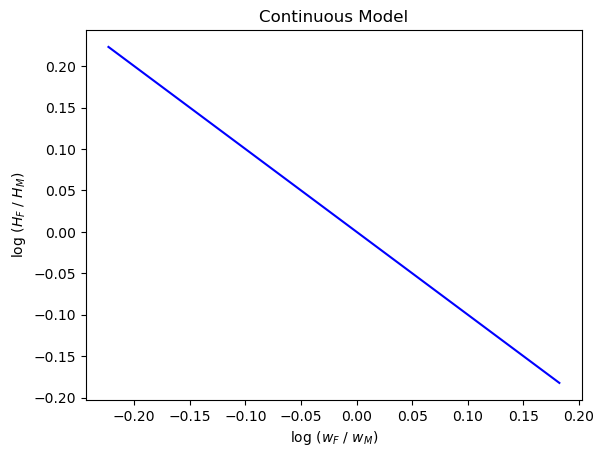

In [5]:
# Relation between WF and WM
mo.par.alpha = 0.5
mo.par.sigma = 1
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]
HF_HM_c = np.empty(5)
wF_wM_c = np.empty(5)

#Continuous:
for i, wF in enumerate(mo.par.wF_vec):
    mo.par.wF = wF
    opt = mo.solve_con()

    HF_HM_c[i] = np.log(opt.HF/opt.HM)
    wF_wM_c[i] = np.log(mo.par.wF/mo.par.wM)
        
#Plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Continuous Model')
ax.plot(wF_wM_c, HF_HM_c, color="blue")
ax.set_xlabel("log ($w_F$ / $w_M$)")
ax.set_ylabel("log ($H_F$ / $H_M$)")
plt.show()


4. Choose $\alpha$ and $\sigma$ such that it minimizes $(\beta_0-\hat{\beta}_0)^2+(\beta_1-\hat{\beta}_1)^2$. Illustrate how the model fit the data and discuss the economic interpretation of the results. 

Alpha = 0.982
sigma = 0.100
beta_1 = -0.100
beta_0 = 0.400
Error = 0.000


Text(0.5, 1.0, 'Regression Model')

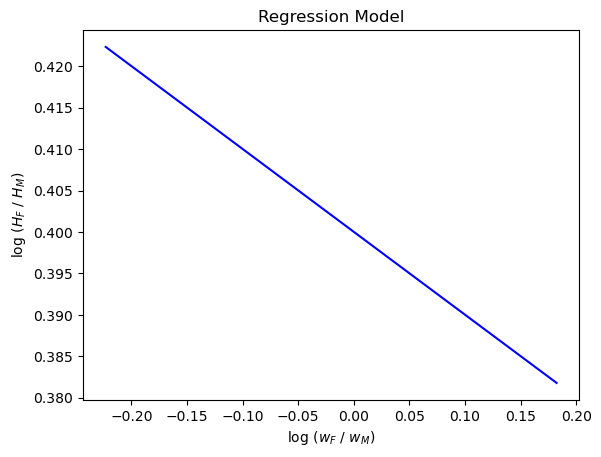

In [7]:
# Estimating the coefficients from the class method
results = mo.estimate()

# Setting attributes
alpha = mo.par.alpha
sigma = mo.par.sigma
error = results.error

# Retrieving minimizing alpha and sigma values
print(f'Alpha = {mo.par.alpha:.3f}')
print(f'sigma = {mo.par.sigma:.3f}')
print(f'beta_1 = {mo.sol.beta1:.3f}') 
print(f'beta_0 = {mo.sol.beta0:.3f}')
print(f'Error = {results.error:.3f}')

# Creating a plot of the estimated regression model
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]
HF_HM_c = np.empty(5)
wF_wM_c = np.empty(5)
reg_plot = np.empty(5)

for i, wF in enumerate(mo.par.wF_vec):
    mo.par.wF = wF
    opt = mo.solve_con()

    HF_HM_c[i] = np.log(opt.HF/opt.HM)
    wF_wM_c[i] = np.log(mo.par.wF/mo.par.wM)
    reg_plot[i] = 0.4 - 0.1*wF_wM_c[i]

# Plotting the model
plt.plot(wF_wM_c, HF_HM_c, color='Blue')
plt.xlabel("log ($w_F$ / $w_M$)")
plt.ylabel("log ($H_F$ / $H_M$)")
plt.title("Regression Model")

From the values and figure we see that we get corresponding values with that of Siminiski/Yetsenga. 

Question 5: Suggest and implement an extension of the model, and analyze whether or not it can help match the data when $\alpha=0.5$

In [8]:
# We start by resetting the epsilon-value
mo.par.epsilon = 1

# Run baseline model
results = mo.estimation_extended(extended=False)

# Results for constant alpha
print(f'With alpha=0.5$, minimizing parameters are:')
print(f'sigma = {float(mo.par.sigma):3f}')
print(f'beta_1 = {mo.sol.beta1:.3f}')
print(f'beta_0 = {mo.sol.beta0:.3f}')
print(f'Error = {results.error:.3f}')

With alpha=0.5$, minimizing parameters are:
sigma = 0.099902
beta_1 = -0.100
beta_0 = 0.000
Error = 0.160
